               coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0


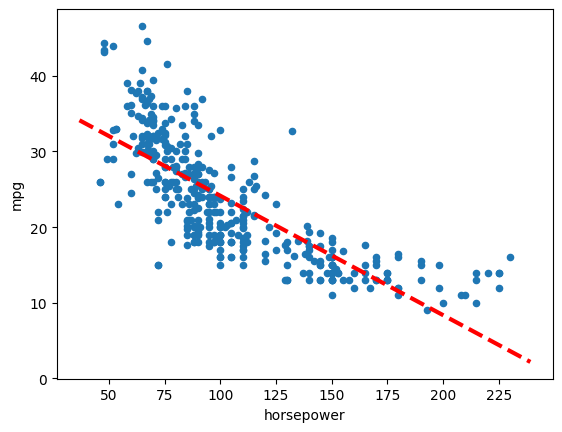

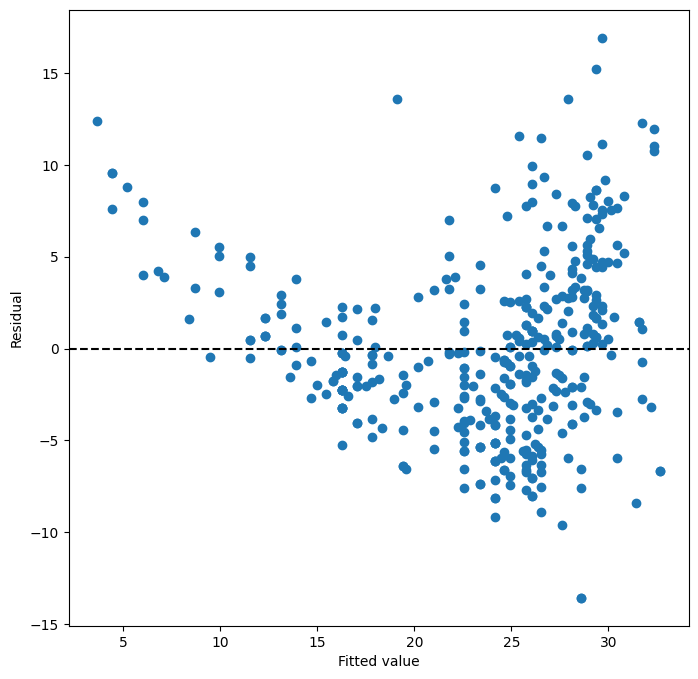

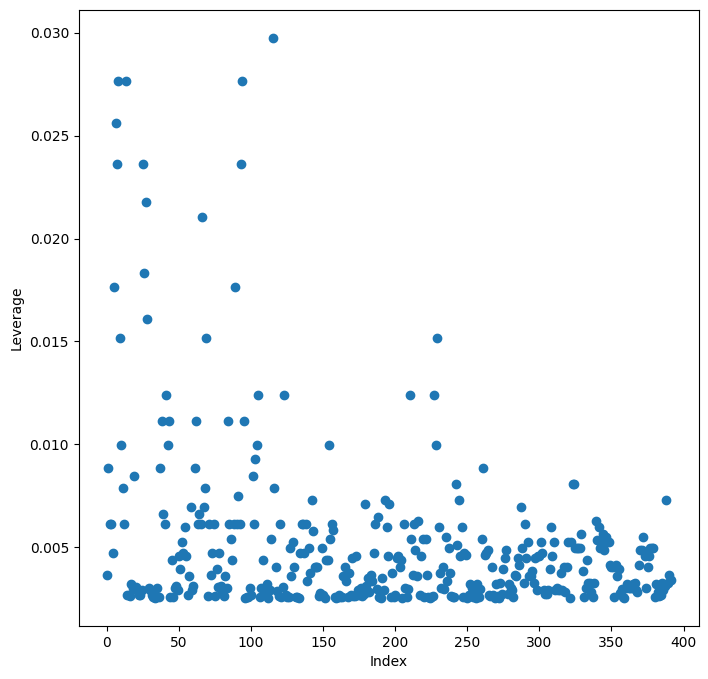

In [1]:
"""Chapter 3 | Linear Regression applied exercises."""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import summarize


def main():
    """Run Python scipt."""
    # (a) Use the sm.OLS() function to perform a simple linear regression with
    # mpg as the response and horsepower as the predictor. Use the summarize()
    # function to print the results. Comment on the output. For example:
    #
    # i.   Is there a relationship between the predictor and the response?
    # ii.  How strong is the relationship between the predictor and the
    #      response?
    # iii. Is the relationship between the predictor and the response positive
    #      or negative?
    # iv.  What is the predicted mpg associated with a horsepower of 98? What
    #      are the associated 95% confidence and prediction intervals?

    auto_data = load_data("Auto")
    X = pd.DataFrame(
        {
            "intercept": np.ones(auto_data.shape[0]),
            "horsepower": auto_data["horsepower"],
        }
    )
    y = auto_data["mpg"]
    model = sm.OLS(y, X)
    results = model.fit()
    print(summarize(results))

    # i. There appears to be a statistically significant relationship between
    # horsepower and mpg due to a p-value of 0 for the horsepower coefficient.

    # ii. The large negative coefficient and high t-value for the predictor
    # suggests a strong negative relationship between horsepower and mpg.

    # iii. The relationship is negative as can be seen by the negative sign
    # in the coefficient for the predictor.

    # iv. mpg = 39.9359 − 0.1578 × 98 = 39.9359 − 15.4644 = 24.4715

    # (b) Plot the response and the predictor in a new set of axes ax.
    # Use the ax.axline() method or the abline() function defined in the lab
    # to display the least squares regression line.

    def abline(ax, b, m, *args, **kwargs):
        "Add a line with slope m and intercept b to ax"
        xlim = ax.get_xlim()
        ylim = [m * xlim[0] + b, m * xlim[1] + b]
        ax.plot(xlim, ylim, *args, **kwargs)
        plt.show()

    auto_data = load_data("Auto")
    ax = auto_data.plot.scatter("horsepower", "mpg")
    abline(ax, results.params[0], results.params[1], "r--", linewidth=3)

    # (c) Produce some diagnostic plots of the least squares regression fit
    # as described in the lab. Comment on any problems you see with the fit.

    ax = plt.subplots(figsize=(8, 8))[1]
    ax.scatter(results.fittedvalues, results.resid)
    ax.set_xlabel('Fitted value')
    ax.set_ylabel('Residual')
    ax.axhline(0, c='k', ls='--')
    plt.show()

    infl = results.get_influence()
    ax = plt.subplots(figsize=(8,8))[1]
    ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage')
    np.argmax(infl.hat_matrix_diag)
    plt.show()

    # The first plot shows the relationship is curved and non-linear. There is
    # also increasing spread of the residuals (heteroscedasticity) as we look
    # further to the right of the x-axis. This suggests variance of errors that
    # is not constant across all levels of the predictor. The second plot shows
    # there are several high leverage points which could influence our model
    # unfairly in comparison to other observations.


if __name__ == "__main__":
    main()
